## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Reading the data

In [2]:
df = pd.read_csv('E:/data science/capstone Projects/Additional projects/Wine Quality/winequalityN.csv')

In [3]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1599,white,6.7,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.40,6
2407,white,7.6,0.31,0.27,5.8,0.036,23.0,109.0,0.99399,3.34,0.54,11.00,6
209,white,6.1,0.40,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.50,6
6390,red,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5
1820,white,6.8,0.30,0.35,2.8,0.038,10.0,164.0,0.99120,3.09,0.53,12.00,6


## Data Cleaning and Preprocessing

Before performing any analysis on data, it's important to deal with null values as they are prone to major errors and inconsistencies

Now we check for total no. of null values in each column

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

There are null values present in the following columns:
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates'

For each column, instead of dropping rows with null values, I will instead be replacing them with either median or mean. Simply dropping the rows will considerably reduce the size of the dataset and hence might degrade performance of the models

In [5]:
#Replacing null values in fixed acidity with median
df['fixed acidity'].fillna(df['fixed acidity'].median(), inplace=True)
df['fixed acidity'].isna().sum()

0

In [6]:
#Replacing null values in volatile acidity with mean
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['volatile acidity'].isna().sum()

0

In [7]:
#Replacing null values in citric acid with mean
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['citric acid'].isna().sum()

0

In [8]:
#Replacing null values in residual sugar with mean
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['residual sugar'].isna().sum()

0

In [9]:
#Replacing null values in chlorides with median
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['chlorides'].isna().sum()

0

In [10]:
#Replacing null values in pH with mean
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['pH'].isna().sum()

0

In [11]:
#Replacing null values in sulphates with median
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)
df['sulphates'].isna().sum()

0

In [12]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No more null values.

Now, since we're predicting the target variable quality, we'll have to categorize the numbers into low, medium and high and then encode it to 0,1 and 2 for classification

In [13]:
df['quality'].min()
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
#Mapping values of target variable quality to 'low', 'medium' and 'high' categories for classification
df['quality']=df['quality'].map({3:'low', 4:'low', 5:'medium', 6:'medium', 7:'medium', 8:'high', 9:'high'})

In [15]:
df['quality']=df['quality'].map({'low':0,'medium':1,'high':2})

In [16]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,white,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,1
3269,white,6.6,0.38,0.36,9.2,0.061,42.0,214.0,0.99760,3.31,0.56,9.4,1
2021,white,6.3,0.21,0.28,1.5,0.051,46.0,142.0,0.99280,3.23,0.42,10.1,1
5141,red,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1
3985,white,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,1


### Removal of Outliers

Outliers are extreme cases of data that may severely affect the prediction capailities of the machine learning models. Therefore, its critical that we remove them.

I will now be plotting a boxplot to view the general distribution of data across all features to check for outliers.

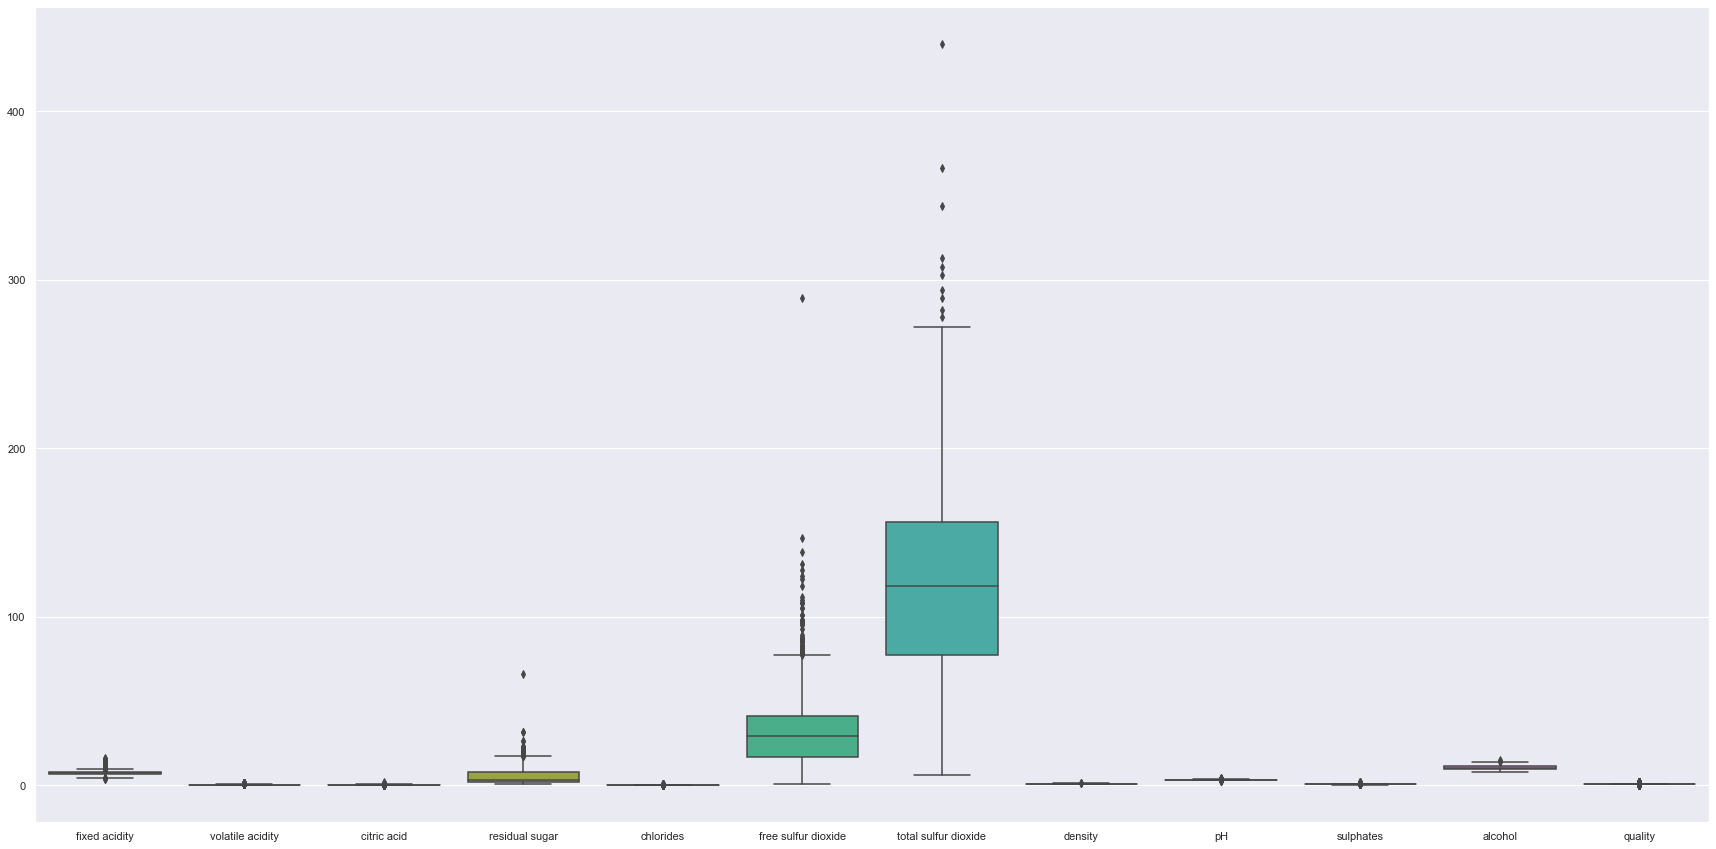

In [17]:
sn.set()
plt.figure(figsize=(30,15))
sn.boxplot(data=df)
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore')

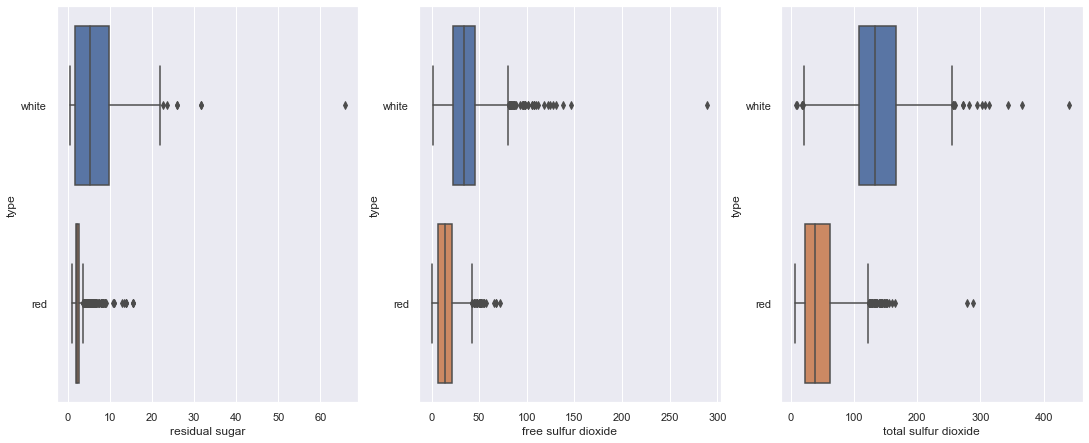

In [20]:
fig, ax =plt.subplots(1,3)
plt.subplots_adjust(right=2.5, top=1.5)
sn.boxplot(df['residual sugar'], df['type'], ax=ax[0])
sn.boxplot(df['free sulfur dioxide'], df['type'], ax=ax[1])
sn.boxplot(df['total sulfur dioxide'], df['type'], ax=ax[2])
plt.show()

In these three columns we can notice significant outliers. Therefore, they must be removed from the respective columns.

In [21]:
#Removing outliers in residual sugar
lower = df['residual sugar'].mean()-3*df['residual sugar'].std()
upper = df['residual sugar'].mean()+3*df['residual sugar'].std()
df = df[(df['residual sugar']>lower) & (df['residual sugar']<upper)]

#Removing outliers in free sulfur dioxide
lower = df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper = df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()
df = df[(df['free sulfur dioxide']>lower) & (df['free sulfur dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = df['total sulfur dioxide'].mean()-3*df['total sulfur dioxide'].std()
upper = df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std()
df = df[(df['total sulfur dioxide']>lower) & (df['total sulfur dioxide']<upper)]

### 1-Hot encoding

The 'type' column must be 1-hot encoded for classification. 1-hot encoding creates a binary column for each category. Here we use pd.get_dummies() to remove the first category and essentially bring it to one column of 1's and 0's where 1 denotes white wine and 0 denotes not white (red wine).

In [22]:
dummies = pd.get_dummies(df['type'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop('type', axis=1, inplace=True)

## Correlation between features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
fixed acidity,1.000000,0.218255,0.324128,-0.116730,0.298735,-0.291882,-0.334312,0.472197,-0.251942,0.302811,-0.097376,-0.047129,-0.487309
volatile acidity,0.218255,1.000000,-0.383308,-0.210471,0.377604,-0.364126,-0.418742,0.271766,0.261415,0.226702,-0.040892,-0.145270,-0.654117
citric acid,0.324128,-0.383308,1.000000,0.141193,0.039903,0.150836,0.196909,0.094774,-0.330207,0.057526,-0.015040,0.056634,0.189081
residual sugar,-0.116730,-0.210471,0.141193,1.000000,-0.134400,0.442246,0.509748,0.525926,-0.266824,-0.184795,-0.367276,0.035516,0.354639
chlorides,0.298735,0.377604,0.039903,-0.134400,1.000000,-0.201236,-0.281981,0.373174,0.044427,0.397295,-0.258898,-0.077751,-0.513067
free sulfur dioxide,-0.291882,-0.364126,0.150836,0.442246,-0.201236,1.000000,0.729294,0.031023,-0.154769,-0.201343,-0.185448,0.112647,0.490710
total sulfur dioxide,-0.334312,-0.418742,0.196909,0.509748,-0.281981,0.729294,1.000000,0.024340,-0.238709,-0.280043,-0.266838,0.040543,0.706462
density,0.472197,0.271766,0.094774,0.525926,0.373174,0.031023,0.024340,1.000000,0.018118,0.273885,-0.703323,-0.099886,-0.409345
pH,-0.251942,0.261415,-0.330207,-0.266824,0.044427,-0.154769,-0.238709,0.018118,1.000000,0.187523,0.119069,-0.008487,-0.329212
sulphates,0.302811,0.226702,0.057526,-0.184795,0.397295,-0.201343,-0.280043,0.273885,0.187523,1.000000,-0.007619,0.006368,-0.488597


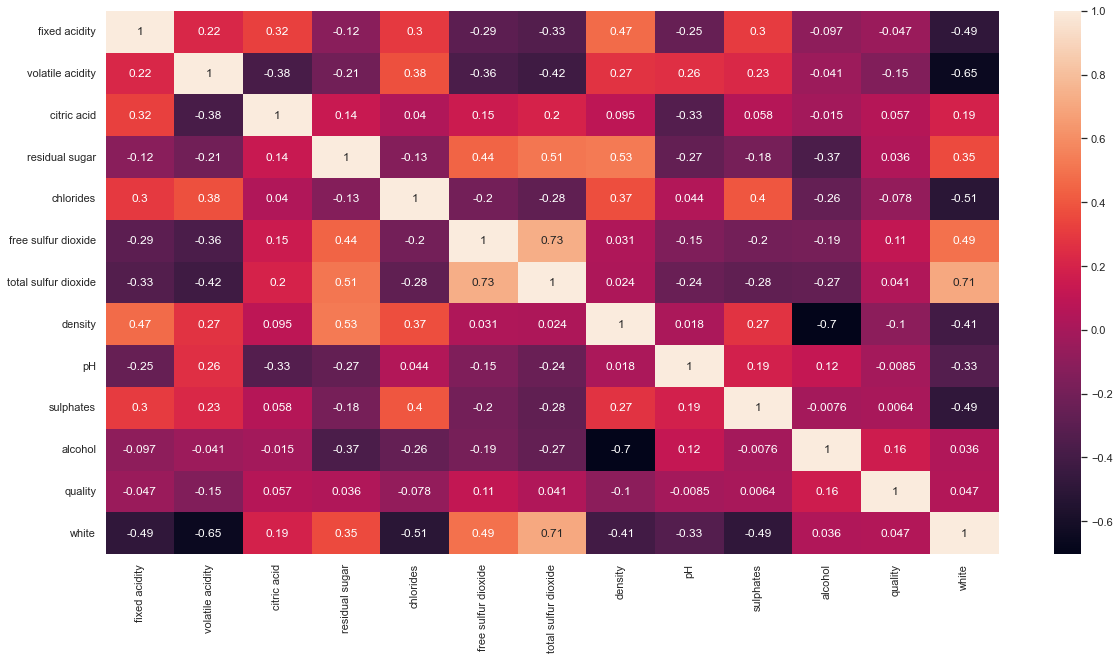

In [23]:
#Checking relationship between features
cor=df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
cor

## Train-Test split

I will be splitting the dataset into training and testing sets in the ratio of 0.80:0.20

In [24]:
X = df.loc[:,df.columns!='quality']
y = df['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=0)

## Model Fitting

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [27]:
# Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9463452566096423